<a href="https://colab.research.google.com/github/gourav-prateek-sharma/5G-delay-Timeseries-Precapstone/blob/main/rtt_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def process_trip_data(trip_data):
    """Processes a single trip data dictionary."""
    try:
        # Check if essential keys are present
        if not all(key in trip_data for key in ["seqno", "timestamps", "delay"]):
            return None

        # Extract relevant information
        seqno = trip_data["seqno"]
        lost = trip_data["lost"] == "true"  # Convert string "true/false" to boolean
        client_send_wall = trip_data["timestamps"]["client"]["send"]["wall"]
        server_receive_wall = trip_data["timestamps"]["server"]["receive"]["wall"]
        rtt = trip_data["delay"]["rtt"]

        return {
            "seqno": seqno,
            "lost": lost,
            "client_send_wall": client_send_wall,
            "server_receive_wall": server_receive_wall,
            "rtt": rtt,
        }
    except (KeyError, TypeError, ValueError):
        return None

def process_round_trips(json_file):
    """Processes all round trips in the given JSON file."""
    processed_trips = []
    with open(json_file, 'r') as f:
      json_data = json.load(f)
      for trip_data in json_data.get("round_trips", []):
          processed_trip = process_trip_data(trip_data)
          if processed_trip:
              processed_trips.append(processed_trip)
    return processed_trips

def calculate_rtt_values(json_file):
    """Extracts RTT values from a JSON file."""
    all_rtt_values = []
    with open(json_file, 'r') as f:
        json_data = json.load(f)
    for trip_data in json_data.get("round_trips", []):
        try:
            rtt = trip_data["delay"]["rtt"]/1e6 #convert from ns to ms
            all_rtt_values.append(rtt)
        except (KeyError, TypeError):
            pass
    return all_rtt_values

def calculate_rtt_statistics(json_file):
    """Calculates RTT statistics for a single JSON file."""
    all_rtt_values = []
    with open(json_file, 'r') as f:
        json_data = json.load(f)
    for trip_data in json_data.get("round_trips", []):
        try:
            rtt = trip_data["delay"]["rtt"]/1e6 #convert from ns to ms
            all_rtt_values.append(rtt)
        except (KeyError, TypeError):
            pass

    rtt_arr = np.array(all_rtt_values)
    statistics = {
        "mean": np.mean(rtt_arr),
        "median": np.median(rtt_arr),
        "90%-tile": np.percentile(rtt_arr, 90),
        "99%-tile": np.percentile(rtt_arr, 99),
        "99.9%-tile": np.percentile(rtt_arr, 99.9),
        "min": np.min(rtt_arr),
        "max": np.max(rtt_arr),
    }
    return statistics


Statistics for s1.json:
  Mean: 39.21 ms
  Median: 39.37 ms
  90%-tile: 49.80 ms
  99%-tile: 56.99 ms
  99.9%-tile: 119.44 ms
  Min: 17.18 ms
  Max: 135.95 ms


Statistics for s2.json:
  Mean: 36.86 ms
  Median: 35.57 ms
  90%-tile: 47.68 ms
  99%-tile: 55.66 ms
  99.9%-tile: 91.49 ms
  Min: 17.84 ms
  Max: 136.16 ms


Statistics for s3.json:
  Mean: 39.62 ms
  Median: 39.06 ms
  90%-tile: 49.38 ms
  99%-tile: 63.40 ms
  99.9%-tile: 154.69 ms
  Min: 16.75 ms
  Max: 377.16 ms


Statistics for s4.json:
  Mean: 38.60 ms
  Median: 37.88 ms
  90%-tile: 50.38 ms
  99%-tile: 62.56 ms
  99.9%-tile: 203.92 ms
  Min: 16.11 ms
  Max: 231.22 ms


Statistics for s5.json:
  Mean: 39.16 ms
  Median: 39.16 ms
  90%-tile: 49.61 ms
  99%-tile: 57.58 ms
  99.9%-tile: 123.73 ms
  Min: 17.07 ms
  Max: 207.09 ms


Statistics for s6.json:
  Mean: 49.34 ms
  Median: 48.93 ms
  90%-tile: 59.70 ms
  99%-tile: 68.76 ms
  99.9%-tile: 203.52 ms
  Min: 18.81 ms
  Max: 385.58 ms


        mean     median   90%-tile 

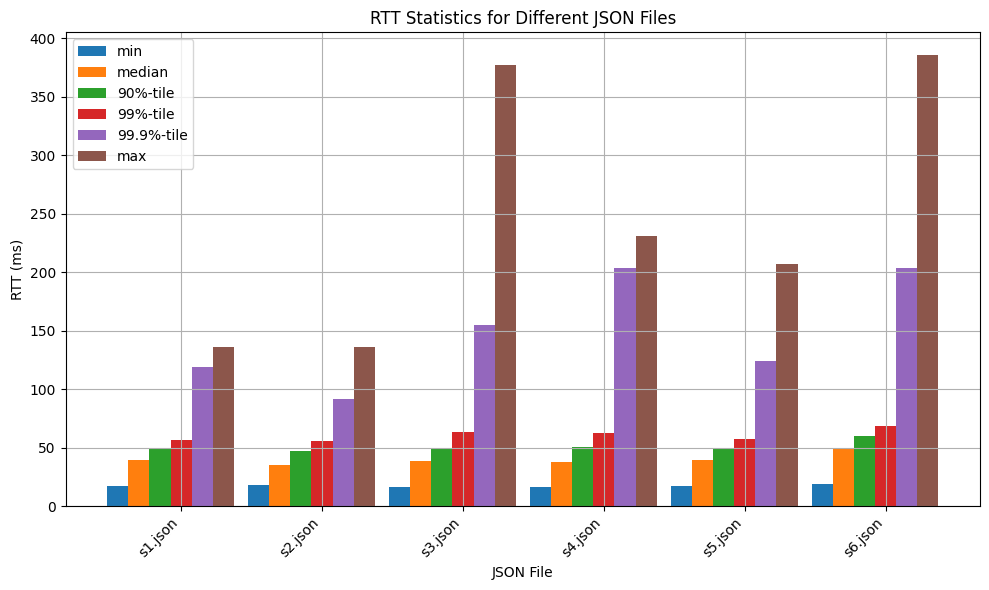

In [9]:
# Example usage:
JSON_FILES = ["s1.json", "s2.json", "s3.json", "s4.json", "s5.json", "s6.json"]  # Replace with your file paths
all_stats = []

for json_file in JSON_FILES:
    print(f"Statistics for {json_file}:")
    rtt_stats = calculate_rtt_statistics(json_file)
    for stat_name, stat_value in rtt_stats.items():
        print(f"  {stat_name.capitalize()}: {stat_value:.2f} ms")
    print("\n")  # Add a newline for separation
    rtt_stats['json_file'] = json_file  # Add the filename for identification
    all_stats.append(rtt_stats)

# Create a Pandas DataFrame
df = pd.DataFrame(all_stats)
print(df)

# Select the columns for the plot
stats_to_plot = ['min', 'median', '90%-tile', '99%-tile', '99.9%-tile', 'max']

# Get the JSON file names
json_files = df['json_file'].tolist()

# Get the values for each statistic
values = df[stats_to_plot].values.T

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(json_files))

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, stat_name in enumerate(stats_to_plot):
    ax.bar(x_pos + i * bar_width, values[i], width=bar_width, label=stat_name)

# Customize the plot
ax.set_xlabel("JSON File")
ax.set_ylabel("RTT (ms)")
ax.set_title("RTT Statistics for Different JSON Files")
ax.set_xticks(x_pos + bar_width * (len(stats_to_plot) / 2))  # Center the x-axis labels
ax.set_xticklabels(json_files, rotation=45, ha='right')  # Rotate and align x-axis labels
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

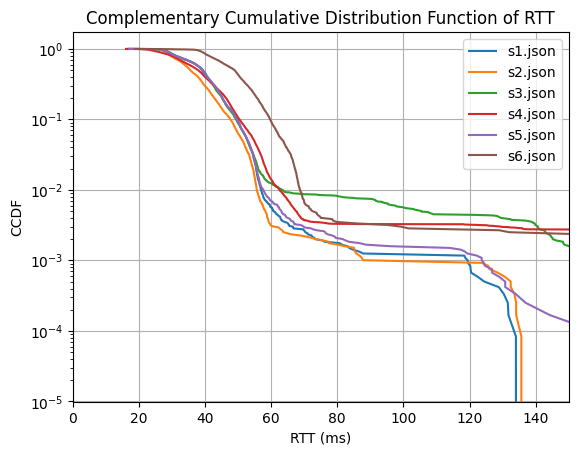

In [52]:
# Example usage:
JSON_FILES = ["s1.json", "s2.json", "s3.json", "s4.json", "s5.json", "s6.json"]  # Replace with your file paths

fig, ax = plt.subplots()

for json_file in JSON_FILES:
    rtt_values = calculate_rtt_values(json_file)
    sorted_rtt = np.sort(rtt_values)
    ccdf = 1 - np.arange(1, len(sorted_rtt) + 1) / len(sorted_rtt)
    ax.plot(sorted_rtt, ccdf, label=json_file)

ax.set_yscale("log")
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("CCDF")
ax.set_title("Complementary Cumulative Distribution Function of RTT")
ax.set_xlim(0, 150)
ax.grid(True)
ax.legend()
plt.show()

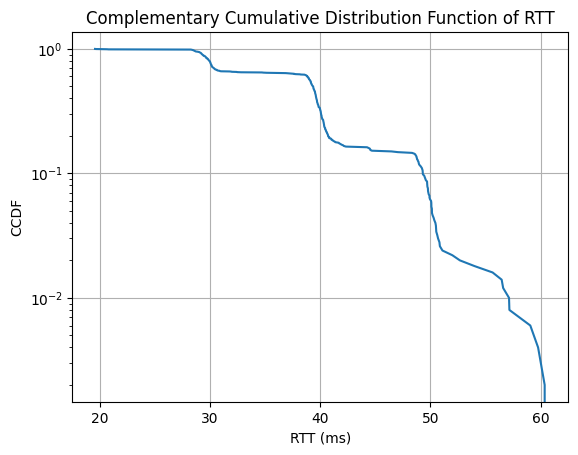

In [ ]:
# 4. Plot CCDF using ax.plot:
fig, ax = plt.subplots()  # Create figure and axes objects
sorted_rtt = np.sort(rtt_arr)
ccdf = 1 - np.arange(1, len(sorted_rtt) + 1) / len(sorted_rtt)
ax.plot(sorted_rtt, ccdf)  # Use ax.plot instead of plt.plot
ax.set_yscale("log")  # Set x-axis to logarithmic scale
ax.set_xlabel("RTT (ms)")
ax.set_ylabel("CCDF")
ax.set_title("Complementary Cumulative Distribution Function of RTT")
ax.grid(True)
plt.show()

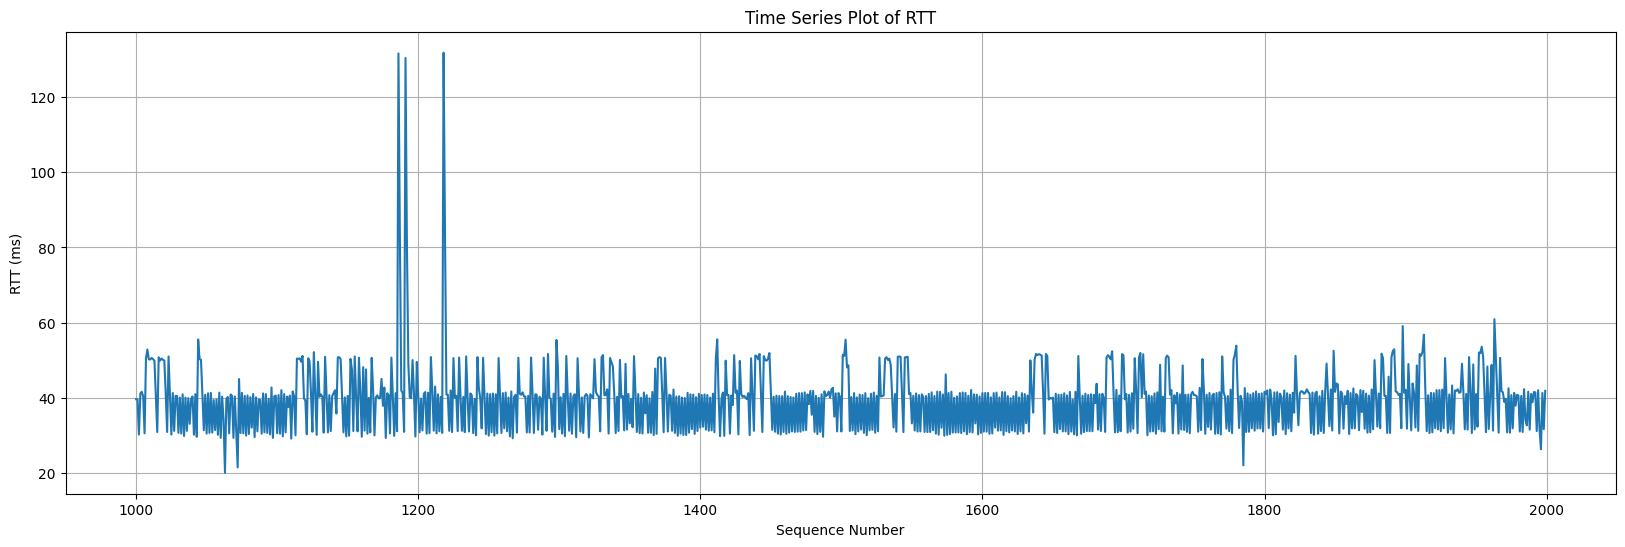

In [ ]:
# Assuming 'start' is the starting sequence number
start = 1000  # Example value, replace with actual start value
num_samples = 1000
end = start + num_samples
# Filter the data based on the starting point
filtered_seqnos = [seqno for seqno in seqno_rtt_dict if seqno >= start and seqno <end]
filtered_rtts = [seqno_rtt_dict[seqno] for seqno in filtered_seqnos]

# Plotting the filtered time series
fig, ax = plt.subplots(figsize=(20, 6))  # Increased horizontal figsize to 20
ax.plot(filtered_seqnos, filtered_rtts)  # Use ax.plot
ax.set_xlabel("Sequence Number")
ax.set_ylabel("RTT (ms)")
ax.set_title("Time Series Plot of RTT")
ax.grid(True)


plt.show()

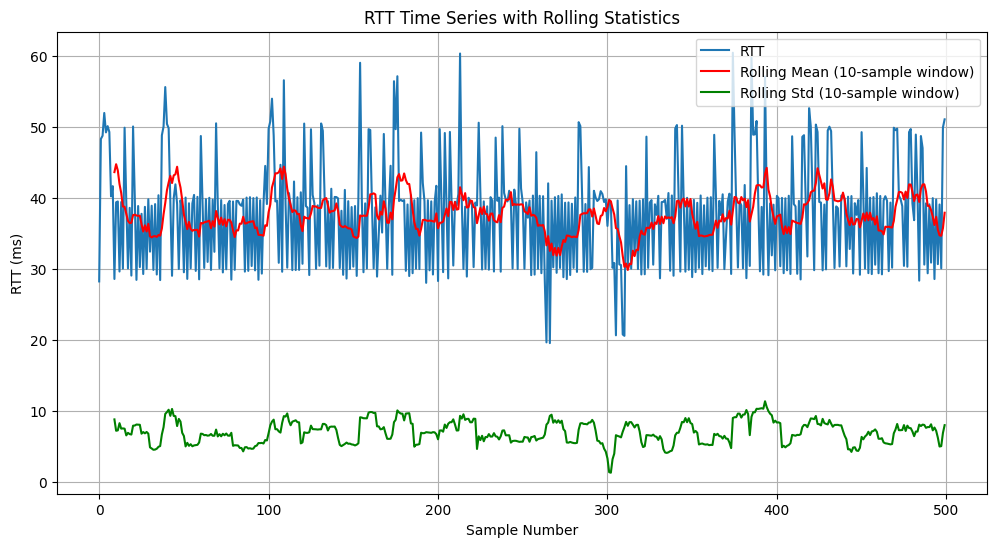

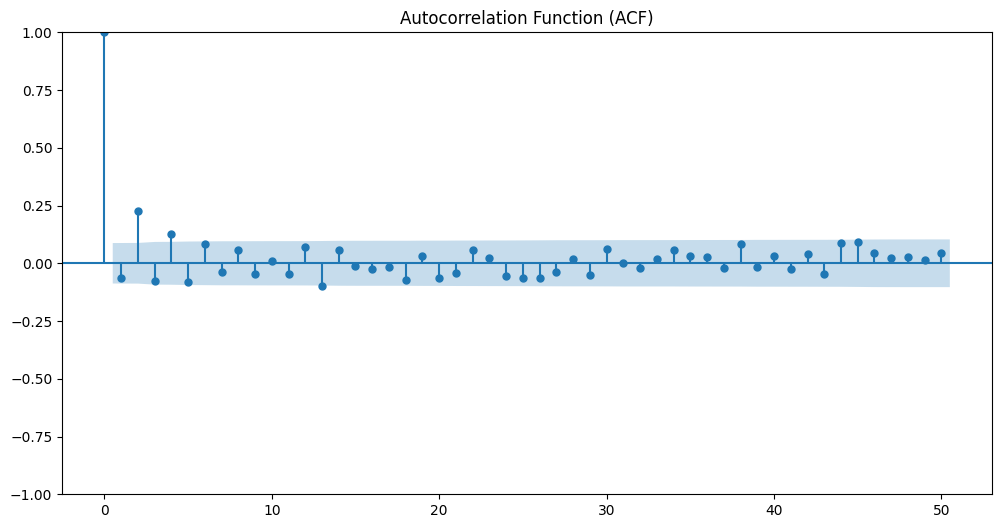

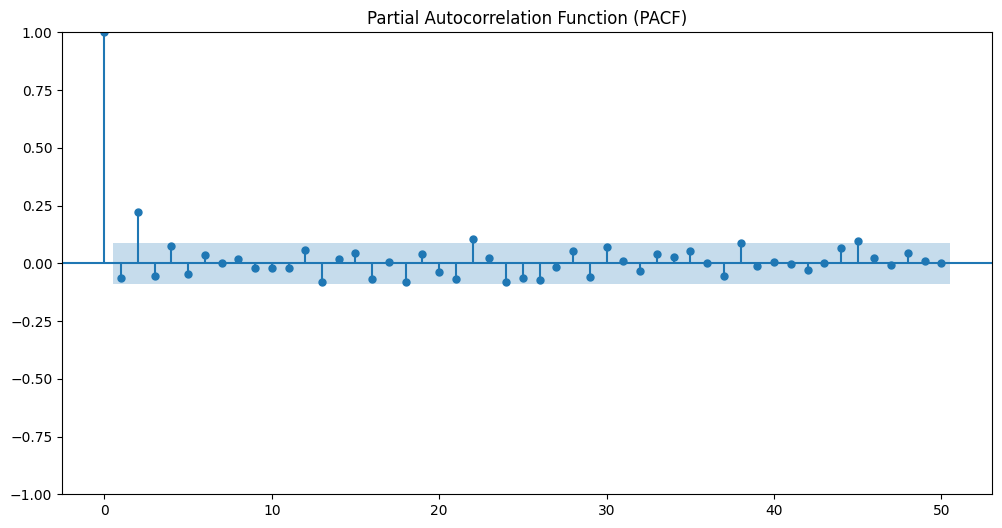

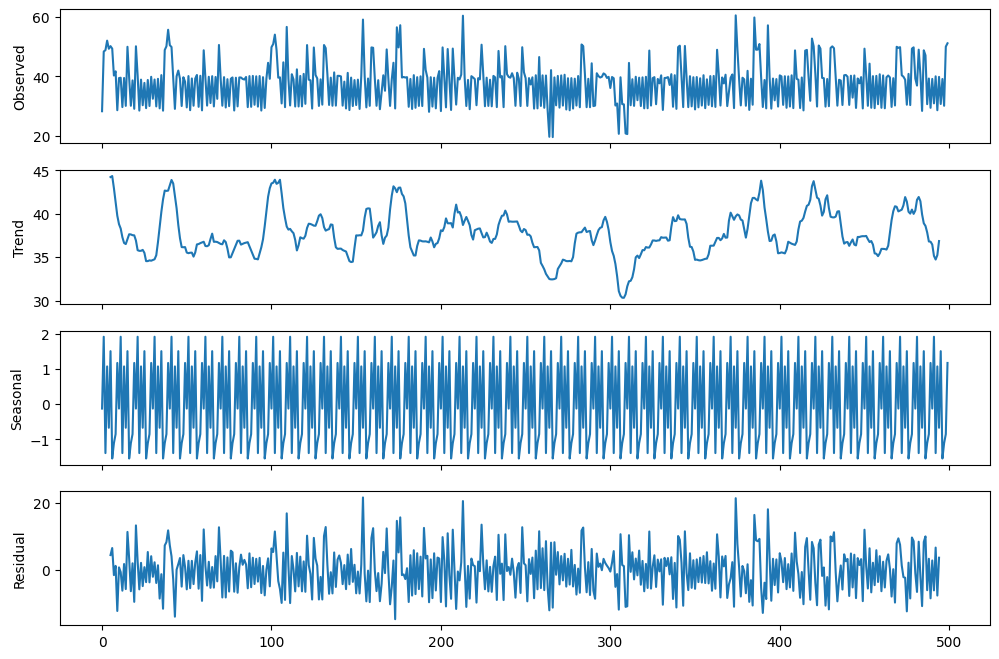

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming rtt_arr and seqno_rtt_dict are already defined

# Create a Pandas Series
rtt_series = pd.Series(rtt_arr)

# Rolling statistics
window_size = 10
rolling_mean = rtt_series.rolling(window=window_size).mean()
rolling_std = rtt_series.rolling(window=window_size).std()

# Plotting rolling statistics
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rtt_series, label='RTT')
ax.plot(rolling_mean, label=f'Rolling Mean ({window_size}-sample window)', color='red')
ax.plot(rolling_std, label=f'Rolling Std ({window_size}-sample window)', color='green')
ax.set_xlabel('Sample Number')
ax.set_ylabel('RTT (ms)')
ax.set_title('RTT Time Series with Rolling Statistics')
ax.legend()
ax.grid(True)
plt.show()

# ACF and PACF
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(rtt_series, lags=50, ax=ax)  # Use ax directly
ax.set_title('Autocorrelation Function (ACF)')
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(rtt_series, lags=50, ax=ax)  # Use ax directly
ax.set_title('Partial Autocorrelation Function (PACF)')
plt.show()

# Decomposition
decomposition = seasonal_decompose(rtt_series, model='additive', period=10)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)  # Create subplots
decomposition.observed.plot(ax=axes[0], legend=False)
decomposition.trend.plot(ax=axes[1], legend=False)
decomposition.seasonal.plot(ax=axes[2], legend=False)
decomposition.resid.plot(ax=axes[3], legend=False)
axes[0].set_ylabel('Observed')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Assuming rtt_arr is already defined

# Filter outliers above 45ms
rtt_arr_filtered = rtt_arr[rtt_arr <= 45]

# 1. Data Preparation:
# Create a Pandas Series
rtt_series = pd.Series(rtt_arr_filtered)  # Use filtered data

# Normalize data to the range [0, 1]
scaler = MinMaxScaler()
rtt_data = scaler.fit_transform(rtt_series.values.reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(rtt_data) * 0.8)  # 80% for training
train_data, test_data = rtt_data[0:train_size, :], rtt_data[train_size:len(rtt_data), :]

# Create dataset with lookback
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  # Adjust as needed
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 2. Build and Train RNN Model:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)  # Adjust epochs and batch size

# 3. Evaluate Model:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(np.mean((train_predict - Y_train)**2))
test_rmse = np.sqrt(np.mean((test_predict - Y_test)**2))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# 4. Plot Predictions:
# ... (Plotting code to visualize predictions against actual values) ...

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train RMSE: 6.10
Test RMSE: 5.79


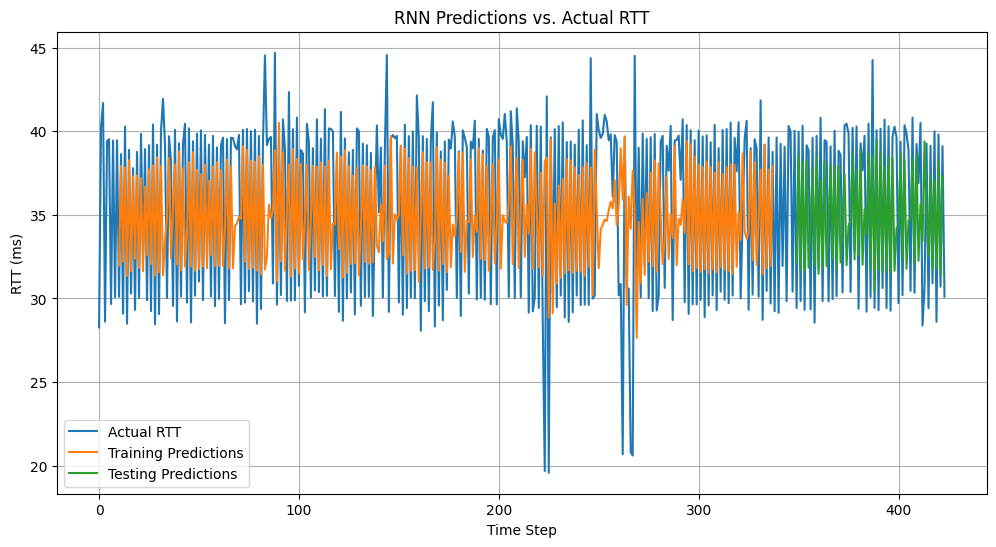

In [ ]:
# ... (previous code) ...

# 4. Plot Predictions:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(rtt_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(rtt_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(rtt_data)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(rtt_data), label='Actual RTT')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Testing Predictions')
plt.legend()
plt.title('RNN Predictions vs. Actual RTT')
plt.xlabel('Time Step')
plt.ylabel('RTT (ms)')
plt.grid(True)
plt.show()